In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
import fitsio
import matplotlib.pyplot as plt

In [34]:
cat = Table.read('/Users/roz18/Downloads/wigglez.dat', format='ascii')
# cat = Table.read('/Users/roz18/Downloads/mosdef_zcat.16aug2016.fits')

In [50]:
print(len(cat))

225415


In [35]:
colnames = ['WiggleZ_Name', 'RA', 'Dec', 'redshift', 'Dredshift', 'Q', 'FUV', 'NUV', 'u', 'g', 'r', 'i', 'z', 'DFUV', 'DNUV', 'Du', 'Dg', 'Dr', 'Di', 'Dz', 'E(B-V)', 'class', 'UTdate', 'MFUV', 'Mass', 'DMass', 'SpecFile', 'comments']
len(colnames)

28

In [36]:
for index in range(28):
    colname_old = 'col'+str(index+1)
    colname_new = colnames[index]
    cat.rename_column(colname_old, colname_new)

In [37]:
cat

WiggleZ_Name,RA,Dec,redshift,Dredshift,Q,FUV,NUV,u,g,r,i,z,DFUV,DNUV,Du,Dg,Dr,Di,Dz,E(B-V),class,UTdate,MFUV,Mass,DMass,SpecFile,comments
str22,float64,float64,float64,float64,int64,str5,str5,str5,str5,str5,str5,str5,str5,str4,str5,str4,str4,str4,str5,str6,str12,int64,str6,str5,str4,str14,str28
R01J003003964+04292093,7.5165551,4.48912,0.35718,0.00015,5,23.92,22.63,null,22.43,21.72,null,21.21,0.25,0.20,null,0.05,0.03,null,0.07,0.0170,WIG_RCS2,20090923,-18.39,9.52,0.15,wig000001.fits,--
R01J003004997+04061148,7.520857,4.10316,0.53924,0.00083,3,25.13,22.55,null,21.75,20.72,null,19.84,0.62,0.31,null,0.03,0.02,null,0.03,0.0181,WIG_RCS2,20090923,-19.44,10.66,0.10,wig000002.fits,--
R01J003005218+03541369,7.521778,3.903775,0.28689,0.00014,5,23.02,21.90,null,20.74,20.01,null,19.45,0.23,0.14,null,0.02,0.01,null,0.03,0.0215,WIG_RCS2,20090923,-18.61,null,null,wig000003.fits,--
R01J003005418-02154809,7.522612,-2.263387,0.22012,2e-05,4,23.29,21.44,null,22.75,21.82,null,20.68,0.38,0.17,null,0.41,0.25,null,8.00,0.0346,WIG_RCS2,20090924,-18.45,null,null,wig000004.fits,--
R01J003005746-02050496,7.523977,-2.084738,0.69012,0.00019,4,24.43,22.15,null,22.86,22.39,null,21.95,0.91,0.19,null,0.05,0.07,null,0.10,0.0291,WIG_RCS2,20090924,-20.45,9.79,0.09,wig000005.fits,--
R01J003005872-02065197,7.524502,-2.114463,1.10484,0.00016,4,null,20.92,null,21.06,20.73,null,20.67,null,0.09,null,0.02,0.01,null,0.03,0.0300,WIG_RCS2,20090924,-22.83,10.34,0.14,wig000006.fits,AGN?
R01J003005972+00350734,7.5249204,0.585343,0.1214,3e-05,3,23.92,22.77,null,21.84,21.10,null,19.54,0.33,0.19,null,0.03,0.15,null,0.02,0.0287,WIG_RCS2,20090919,-15.75,null,null,wig000007.fits,--
R01J003005980+00585280,7.5249519,0.981304,0.70768,0.01021,3,24.06,22.75,null,22.23,21.35,null,20.03,0.35,0.20,null,0.03,0.15,null,0.03,0.0249,WIG_RCS2,20090919,-19.92,11.12,0.35,wig000008.fits,--
R01J003006051-02011552,7.5252505,-2.021007,0.15758,0.00013,4,23.07,21.94,null,21.68,21.27,null,21.01,0.30,0.18,null,0.03,0.03,null,0.06,0.0280,WIG_RCS2,20090924,-17.18,null,null,wig000009.fits,--


In [38]:
cat1 = cat.copy()

In [39]:
for index in range(28):
    colname = colnames[index]
    mask = cat1[colname]=='null'
    if np.sum(mask)>0:
        print(colname)
        d = cat1[colname]
        d[mask] = 'nan'
        d = np.array(d, dtype=float)
        cat1[colname] = d

FUV
NUV
u
g
r
i
z
DFUV
DNUV
Du
Dg
Dr
Di
Dz
E(B-V)
MFUV
Mass
DMass


In [40]:
cat1

WiggleZ_Name,RA,Dec,redshift,Dredshift,Q,FUV,NUV,u,g,r,i,z,DFUV,DNUV,Du,Dg,Dr,Di,Dz,E(B-V),class,UTdate,MFUV,Mass,DMass,SpecFile,comments
str22,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str12,int64,float64,float64,float64,str14,str28
R01J003003964+04292093,7.5165551,4.48912,0.35718,0.00015,5,23.92,22.63,nan,22.43,21.72,nan,21.21,0.25,0.2,nan,0.05,0.03,nan,0.07,0.017,WIG_RCS2,20090923,-18.39,9.52,0.15,wig000001.fits,--
R01J003004997+04061148,7.520857,4.10316,0.53924,0.00083,3,25.13,22.55,nan,21.75,20.72,nan,19.84,0.62,0.31,nan,0.03,0.02,nan,0.03,0.0181,WIG_RCS2,20090923,-19.44,10.66,0.1,wig000002.fits,--
R01J003005218+03541369,7.521778,3.903775,0.28689,0.00014,5,23.02,21.9,nan,20.74,20.01,nan,19.45,0.23,0.14,nan,0.02,0.01,nan,0.03,0.0215,WIG_RCS2,20090923,-18.61,nan,nan,wig000003.fits,--
R01J003005418-02154809,7.522612,-2.263387,0.22012,2e-05,4,23.29,21.44,nan,22.75,21.82,nan,20.68,0.38,0.17,nan,0.41,0.25,nan,8.0,0.0346,WIG_RCS2,20090924,-18.45,nan,nan,wig000004.fits,--
R01J003005746-02050496,7.523977,-2.084738,0.69012,0.00019,4,24.43,22.15,nan,22.86,22.39,nan,21.95,0.91,0.19,nan,0.05,0.07,nan,0.1,0.0291,WIG_RCS2,20090924,-20.45,9.79,0.09,wig000005.fits,--
R01J003005872-02065197,7.524502,-2.114463,1.10484,0.00016,4,nan,20.92,nan,21.06,20.73,nan,20.67,nan,0.09,nan,0.02,0.01,nan,0.03,0.03,WIG_RCS2,20090924,-22.83,10.34,0.14,wig000006.fits,AGN?
R01J003005972+00350734,7.5249204,0.585343,0.1214,3e-05,3,23.92,22.77,nan,21.84,21.1,nan,19.54,0.33,0.19,nan,0.03,0.15,nan,0.02,0.0287,WIG_RCS2,20090919,-15.75,nan,nan,wig000007.fits,--
R01J003005980+00585280,7.5249519,0.981304,0.70768,0.01021,3,24.06,22.75,nan,22.23,21.35,nan,20.03,0.35,0.2,nan,0.03,0.15,nan,0.03,0.0249,WIG_RCS2,20090919,-19.92,11.12,0.35,wig000008.fits,--
R01J003006051-02011552,7.5252505,-2.021007,0.15758,0.00013,4,23.07,21.94,nan,21.68,21.27,nan,21.01,0.3,0.18,nan,0.03,0.03,nan,0.06,0.028,WIG_RCS2,20090924,-17.18,nan,nan,wig000009.fits,--


In [41]:
cat1.write('/Users/roz18/Downloads/wigglez.final.fits')

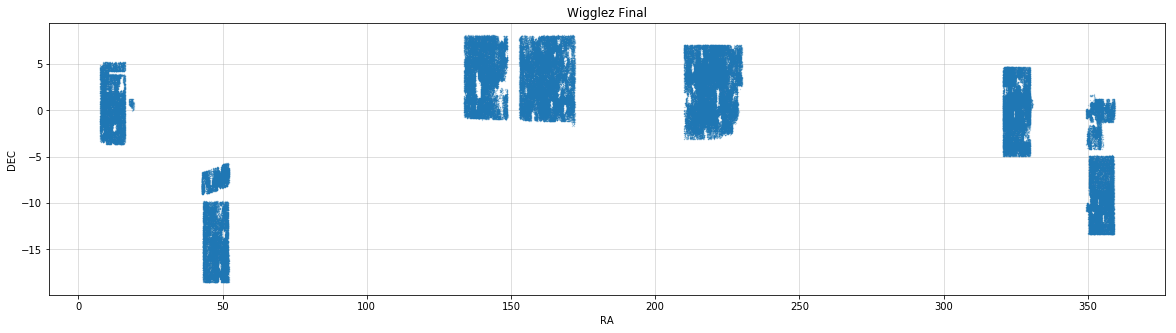

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(cat1['RA'], cat1['Dec'], '.', markersize=.5, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('Wigglez Final')
plt.grid(alpha=0.5)
plt.show()

__Check for duplicates__

In [43]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

In [44]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['Dec'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 objects with a nearby neighbor
0 0.00%


1817 objects with a nearby neighbor
1817 0.81%


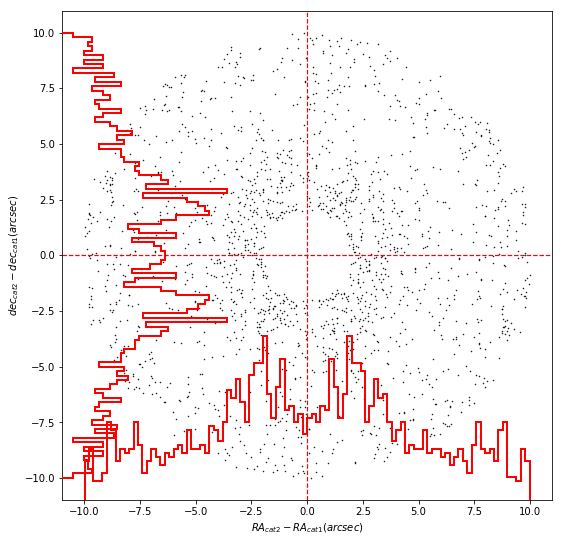

In [45]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['RA'], cat['Dec'], search_radius=10., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))